#  First Order ODEs

We will look at a simple heat transfer problem shown schmatically below.
<img src="circuit.png">
The ODE that gives temperature as a function of time is:

$$\frac{dT}{dt} = -\frac{k}{c}(T - T_w)$$

with $T(0) = T_0$.

### Euler Method

notation

$$\frac{dy}{dt} = f(t, y)$$
with
$$y(t_0) = y_0$$

let $h$ be a very small time step

$$t_{n+1} = t_n = h$$

$$y_{n+1} = y_n + h f(t_n, y_n)$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%matplotlib inline

In [11]:
def heat_equations(t, T):
    k = 0.075
    C = 10
    T_w = 20

    return -k * (T - T_w) / C

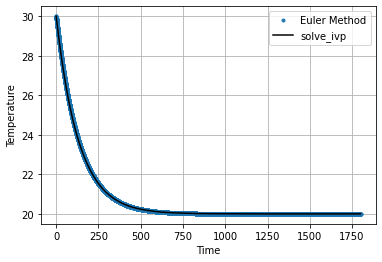

In [12]:
t_eval = np.linspace(0, 1800, 1000)
tspan = (t_eval[0], t_eval[-1])

sol_temp = solve_ivp(heat_equations, tspan, (30, ), t_eval = t_eval)

t = 0
T = 30
time = [];  time.append(t)
temperature = []; temperature.append(T)

h = 0.1
while t <= 1800:
    T = T + h * heat_equations(t, T)
    t = t + h
    time.append(t)
    temperature.append(T)
    
plt.plot(time, temperature, '.', label='Euler Method')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.legend()

#  Second Order ODEs (Oscillations)
<img src="spring2.png"><BR>

From Newton's law we have,
$$F = m\frac{d^x}{dt^2} = - kx$$

Rearranging we ge, 
$$\frac{d^x}{dt^2} + \frac{k}{m}x = 0$$

This has a solution of the form,
$$x = A\cos\left(\sqrt{\frac{k}{m}t} + \phi\right)$$

We'll take the follwoing for the mass and spring constant.<br>
$K = 0.5$<br>
$m = 1$<br>

The initial conditions,
$x(0) = 2$<br>
$v(0) = 0$<br>

Implies $\phi = 0$ and $A = 2$.
$$x(t) = 2\cos\left(\sqrt{\frac{k}{m}t}\right)$$

For numerical solutions, we can write the second-order equation as two coupled first-order equations:

$$\frac{dx}{dt} = V$$
and
$$\frac{dV}{dt} = -\frac{k}{m}x$$

When we use the Euler algorithm in this case, we get very poor results.  See below.

We can tweak the basic idea, however, and get decent agreement with the actual solution.  We can first update the velocity, then use the updated velocity  in the caulcation of the new position.  This is sometimes called the Euler-Cromer method.

In [13]:
#  Function that returns the derivatives
def equations(t, x):
    
    k = 0.5
    m = 1
    
    fprime = np.zeros((2, ))
    
    fprime[0] = x[1]
    fprime[1] = -k/m * x[0]
    
    return fprime

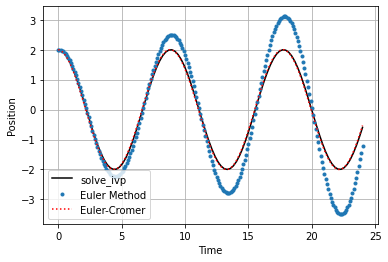

In [14]:
t_eval = np.linspace(0, 24, 100)
tspan = (t_eval[0], t_eval[-1])
x0 = [2, 0]

sol = solve_ivp(equations, tspan, x0, t_eval = t_eval)

plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')


#  Euler method
t = 0
x = 2
V = 0
h = 0.1

time = []; time.append(t)
position = []; position.append(x)
velocity = []; velocity.append(V)

while t <= 24:
    fprime = equations(t, [x, V])
    x = x + h * fprime[0]
    V = V + h * fprime[1]

    
    position.append(x)
    velocity.append(V)
    
    t = t + h
    time.append(t)
    
plt.plot(time, position, '.', label="Euler Method")
plt.xlabel('Time')
plt.ylabel('Position')
plt.grid(True)

#  Euler-Cromer method
t = 0
x = 2
V = 0
h = 0.1
time_ec = []; time_ec.append(t)
position_ec = []; position_ec.append(x)
velocity_ec = []; velocity_ec.append(V)

while t <= 24:
    fprime = equations(t, [x, V])

    V = V + h * fprime[1]
    x = x + h * V
    
    position_ec.append(x)
    velocity.append(V)
    
    t = t + h
    time_ec.append(t)
    
plt.plot(time_ec, position_ec, 'r:', label='Euler-Cromer')
plt.legend()

##  Runge Kutta Methods

$$\frac{dy}{dt} = f(t, y)$$
with $y(t_0) = y_0$.

Our update rule is,
$$t_{N +1}= T_N + h$$
$$y_{N+1} = y_n + \frac{1}{6}h  (k_1 + 2k_2 + 2k_3 + k_4)$$

With
$$
\begin{array}{ll}
k_1 = & f(t_N, y_N) \\
k_2 = & f\left(t_N + \frac{h}{2}. y_N + h\frac{k_1}{2} \right) \\
k_3 = & f\left(t_N + \frac{h}{2}. y_N + h\frac{k_2}{2} \right)\\
k_4 = & f(t_N + h, y_N + hk_3)
\end{array}
$$

##  Runge Kutta:  Heat Flow Problem

Text(0, 0.5, 'Temperature')

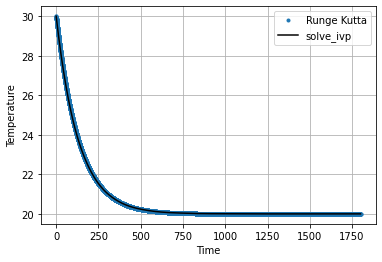

In [15]:
t = 0
T = 30
h = 0.1

time_rk = [];  time_rk.append(t)
temperature_rk = []; temperature_rk.append(T)

while t <= 1800:
    k1 = heat_equations(t, T)
    k2 = heat_equations(t + h/2, T + k1/2 * h)
    k3 = heat_equations(t + h/2, T + k2/2 * h)
    k4 = k4 = heat_equations(t + h, T + h*k3)
    
    t = t + h
    time_rk.append(t)
    
    T = T + (1.0/6.0) * h * (k1 + 2 * k2 + 2 * k4 + k4)
    temperature_rk.append(T)
    
plt.plot(time_rk, temperature_rk, '.', label='Runge Kutta')
plt.plot(sol_temp.t, sol_temp.y[0,:], 'k', label='solve_ivp')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')

##  Harmonic Oscillator

Text(0, 0.5, 'Position')

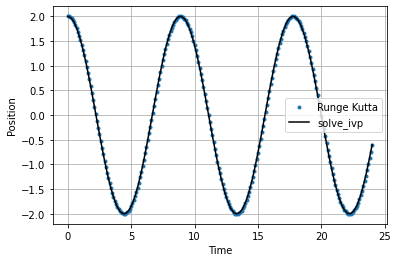

In [16]:
#  Euler method
t = 0
x = 2
V = 0
h = 0.1

time_rk = []; time_rk.append(t)
position_rk = []; position_rk.append(x)
velocity_rk = []; velocity_rk.append(V)

while t <= 24:

    X = [x, V]
    k1 = equations(t, X)
    
    X = [x + k1[0] * h/2, V + k1[1] * h / 2]
    k2 = equations(t + h /2, X)
    
    X = [x + k2[0] * h/2, V + k2[1] * h / 2]
    k3 = equations(t + h /2, X)
    
    X = [x + h*k3[0], V + h*k3[1]]
    k4 = equations(t + h, X)
    
    t = t + h
    time_rk.append(t)
    
    x = x + 1.0/6.0 * h * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
    V = V + 1.0/6.0 * h * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    
    position_rk.append(x)
    velocity_rk.append(V)
    
plt.plot(time_rk, position_rk, '.', label='Runge Kutta')
plt.plot(sol.t, sol.y[0,:], 'k', label='solve_ivp')
plt.grid(True)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')